#Carga de dataset desde Kaggle

El dataset es tomado de la competencia de Kaggle: https://www.kaggle.com/competitions/allstate-claims-severity/data

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#carga del token de kaggle

from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tatianasanchez1","key":"89e2f6fbfe92a172129c5ee2b3bed732"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c allstate-claims-severity

 96% 47.0M/48.8M [00:00<00:00, 79.2MB/s]
100% 48.8M/48.8M [00:00<00:00, 86.5MB/s]


In [ ]:
!unzip allstate-claims-severity.zip


Archive:  allstate-claims-severity.zip
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv               
  inflating: train.csv.zip           


#Exploración del dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Crear dataset 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


Se observa que la base de datos de entrenamiento consta de 188,318 observaciones y 131 variables que incluyen 72 variables categóricas binarias, 43 variables no binarias, 14 variables continuas y la variable de resultado, "Loss"

In [ ]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


La base de datos test está compuesta de manera similar a training, sin embargo tiene 125546 observaciones y no tiene la columna "Loss" pues es la variable respuesta.

###Evaluacion de valores nulos

In [ ]:
#Evaluacion de valores nulos 
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


Como no faltan valores en los datos de prueba y tren, no es necesario realizar un preprocesamiento, estandarización o llenado de datos nulos.

### Evaluacion de datos duplicados

In [ ]:
print("datos duplicados en train:", train.duplicated().sum())
print("datos duplicados en train:", test.duplicated().sum())

datos duplicados en train: 0
datos duplicados en train: 0


###Histograma:

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'cont1'}>,
        <Axes: title={'center': 'cont2'}>,
        <Axes: title={'center': 'cont3'}>],
       [<Axes: title={'center': 'cont4'}>,
        <Axes: title={'center': 'cont5'}>,
        <Axes: title={'center': 'cont6'}>,
        <Axes: title={'center': 'cont7'}>],
       [<Axes: title={'center': 'cont8'}>,
        <Axes: title={'center': 'cont9'}>,
        <Axes: title={'center': 'cont10'}>,
        <Axes: title={'center': 'cont11'}>],
       [<Axes: title={'center': 'cont12'}>,
        <Axes: title={'center': 'cont13'}>,
        <Axes: title={'center': 'cont14'}>,
        <Axes: title={'center': 'loss'}>]], dtype=object)

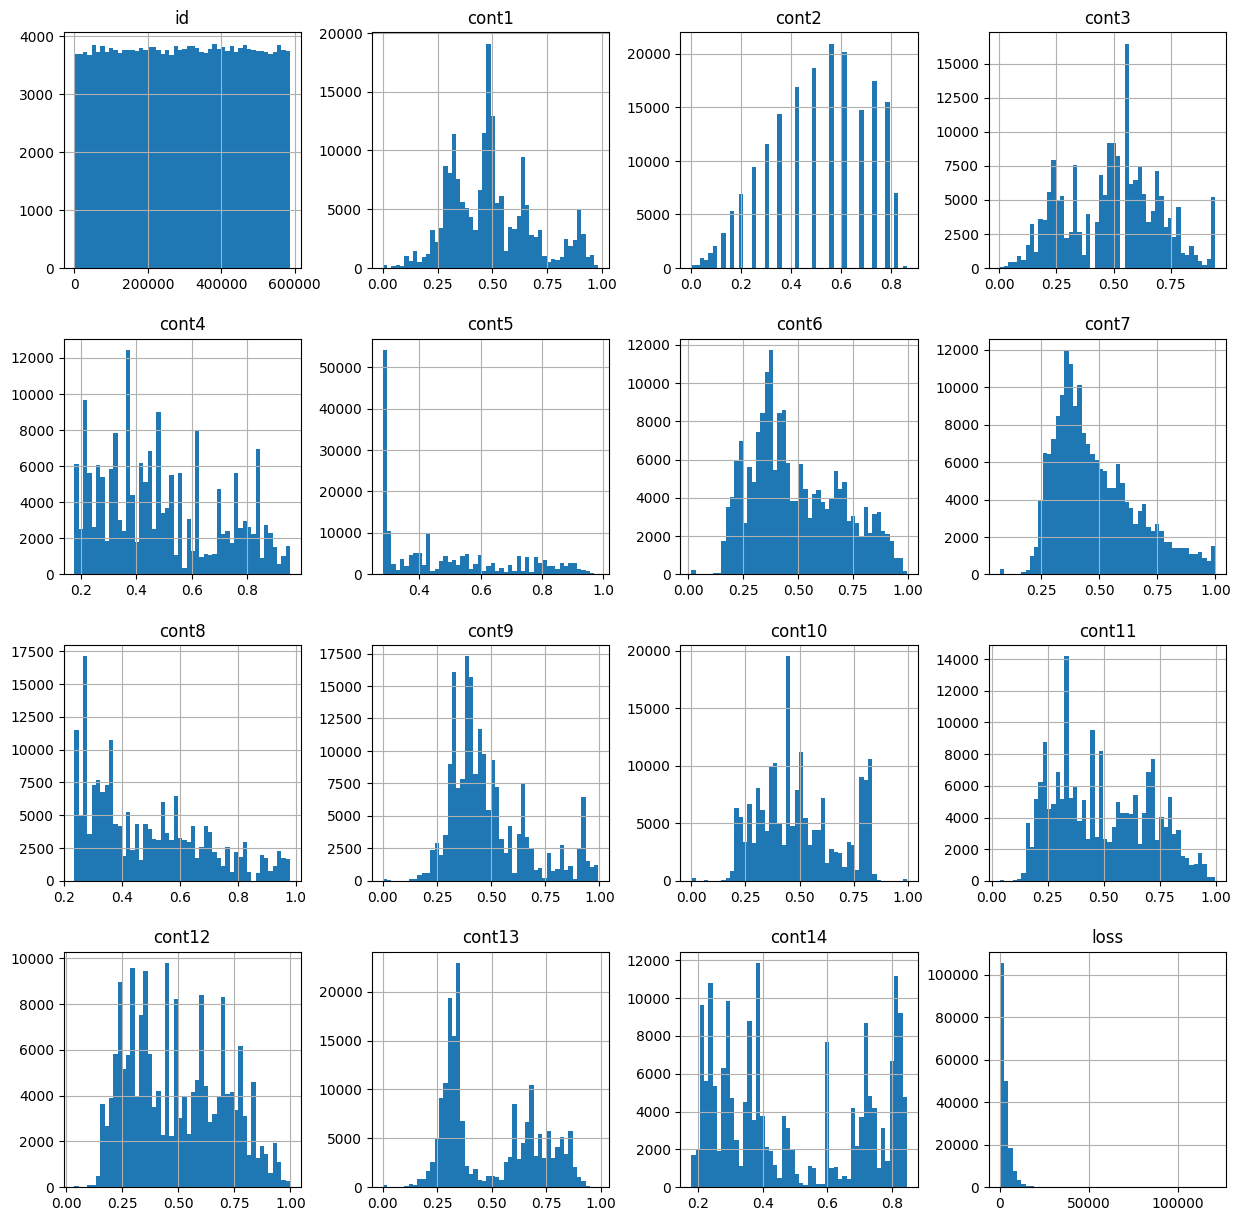

In [ ]:
#Histograma

train.hist(bins=50, figsize=(15,15))

###Matriz de correlacion:

<ipython-input-17-873c3e351494>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr(method='pearson')


<Axes: >

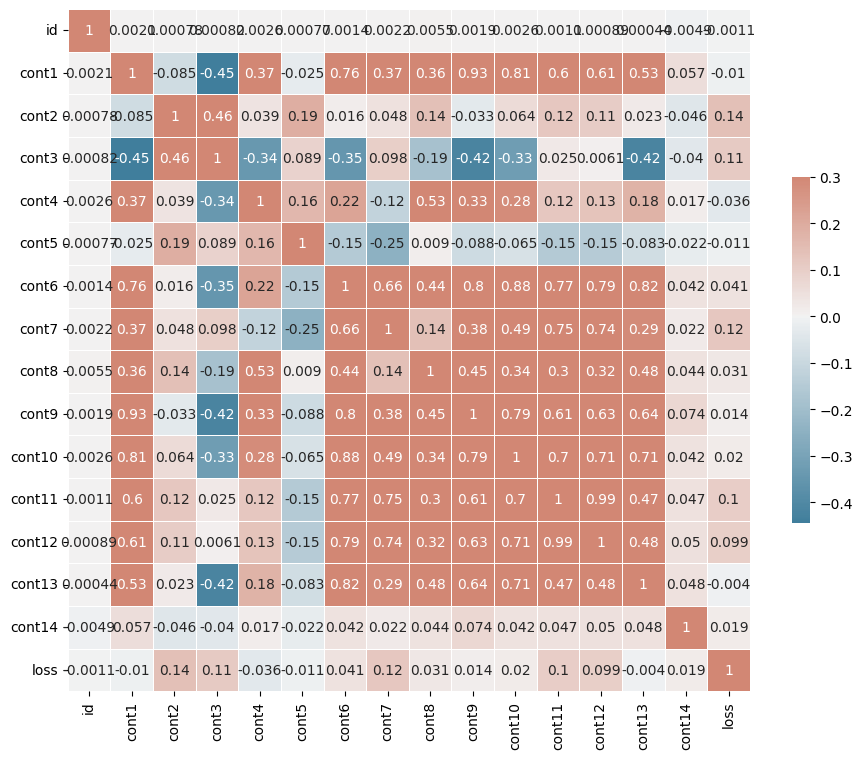

In [ ]:
corr = train.corr(method='pearson')
f, ax, = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True)

cont11 y cont12 (0.99) al igual que cont1 y cont9 (0.93) estan relacionados linealmente por lo que uno de cada uno de estos puede ser eliminado.

###Analisis de variable respuesta

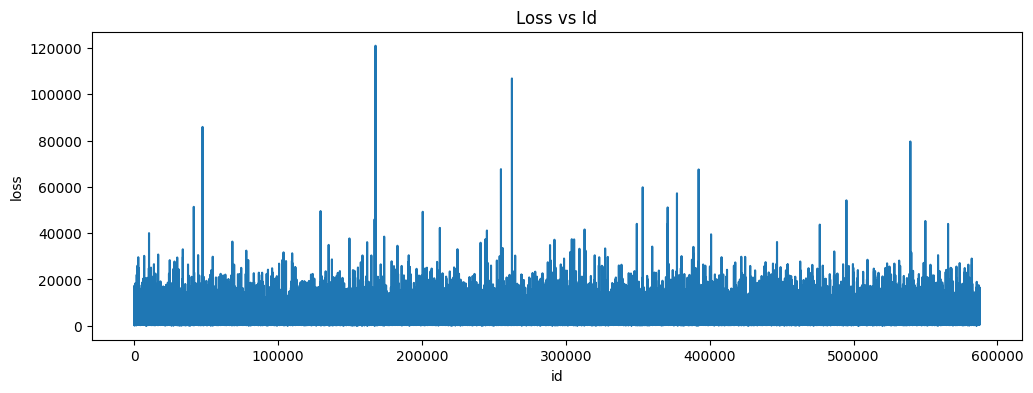

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['id'], train['loss'])
plt.title("Loss vs Id")
plt.xlabel('id')
plt.ylabel('loss')
plt.show()

Se presentan algunos picos con valores muy altos correspondientes a perdidas debido a accidentes graves. 




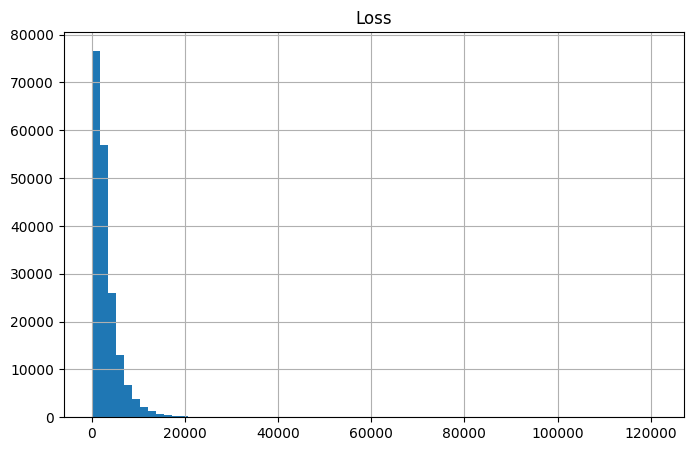

Skewness de la variable objetivo 3.7949583775378604


In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)
ax1.hist(train['loss'], bins=70)
ax1.set_title('Loss')
ax1.grid(True)

plt.show()

print('Skewness de la variable objetivo', train['loss'].skew())

A partir de la grafica y los resultados, vemos que la variable loss está sesgada hacia la derecha, por lo que se aplica la transformación logarítmica.

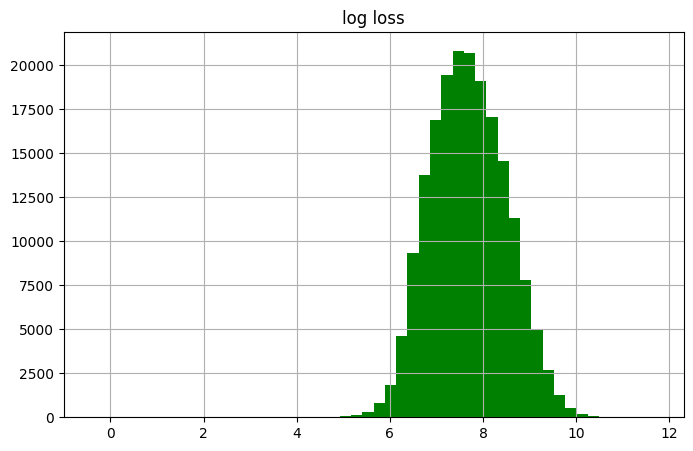

In [ ]:
fig, ax2 = plt.subplots()
fig.set_size_inches(8, 5)
ax2.hist(np.log(train['loss']), bins=50, color='g')
ax2.set_title('log loss')
ax2.grid(True)

plt.show()

De la figura anterior, podemos confirmar que después de aplicar la transformación, ahora los datos parecen estar distribuidos normalmente.
A medida que aplicamos la función logarítmica en la función de destino para convertirla en una distribución normal. Tenemos que aplicar la función 
exponencial en los datos de prueba mientras medimos/predecimos la pérdida (e**y)


###Siguientes etapas:

* Investigación de algritmos de regresion utiles para resolver el caso problema.
* Desarrollo del modelo
* Evaluacion y ajuste
* Seleccion del modelo final
